Newton's law of cooling

Introduction
This notebook simuling the cooling of an object in an enviroment with temperature $Tm$, according to Newton's law.
$$ T(t) = T_m +(T_0-T_m)e^{-rt} $$
Instructions
1. Run each cell in order (Shist + Enter).
2. The graphs are generated automatly.



        Newton's Law of Cooling Simulation
        -----------------------------------------
        Conditions:
        1. Ambient temperature (Tm) < Initial temperature (T0)
        2. All values must be positive.
        


Enter ambient temperature (Tm):  294.15
Enter inicial object temperature (T0):  573.15
Enter cooling coeficient (r):  .2


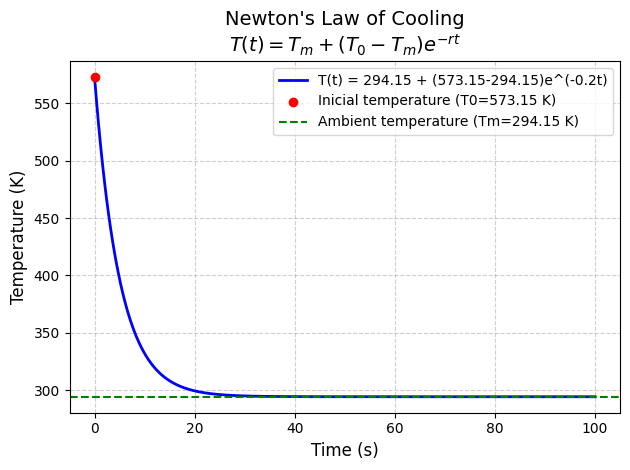

In [3]:
"""
Simulation of the Newton's law of cooling
Author: Luis Fernando Mellado Cañas
Date: April 14, 2025

Description:
This program models the temperature change of an object in a suffounding medium 
over time, according to Newton's law of cooling, and generates a graphs.
"""

import numpy as np
import matplotlib.pyplot as plt

def calculate_cooling(T0,Tm,r,t_points):
    """
    Calculate the temperature over time according to Newton's cooling law.

    Parameters:
    - T0 (float): Initial temperature of the object (in Kelvin).
    - Tm (float): Constant ambient temperature (in Kelvin).
    - r (float): Cooling coefficient (most be > 0).
    - t_points (np.array): Array of time values (in seconds).

    Returns:
    - np.array: Array of temperatures at each time points.
    """
    return Tm+((T0-Tm)*np.exp(-r*t_points))


def plot_cooling_curve(T0, Tm, r, t_points):
    """
    Plot the cooling curve with annotations.

    Parameters:
    - T0, Tm, r, t_points: See 'calculate_cooling' documetation.
    """
    y= calculate_cooling(T0, Tm, r, t_points)
    plt.plot(t_points, y, color="blue", linewidth=2, label=f"T(t) = {Tm} + ({T0}-{Tm})e^(-{r}t)")
    plt.scatter(0, T0, color="red", zorder=5, label=f"Inicial temperature (T0={T0} K)")
    plt.axhline(y=Tm, color="green", linestyle="--", label=f"Ambient temperature (Tm={Tm} K)")

    plt.title("Newton's Law of Cooling\n$T(t) = T_m + (T_0 - T_m)e^{-rt}$", fontsize=14)
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Temperature (K)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()

    #Export figure (opcional)
    plt.savefig("newton_cooling.png", dpi=300)
    plt.show()

if __name__ == "__main__":

    #Interactive begin of the validation parameters.
    print("""
        Newton's Law of Cooling Simulation
        -----------------------------------------
        Conditions:
        1. Ambient temperature (Tm) < Initial temperature (T0)
        2. All values must be positive.
        """)

    while True:
        try:
            Tm = float(input("Enter ambient temperature (Tm): "))
            T0 = float(input("Enter inicial object temperature (T0): "))
            r  = float(input("Enter cooling coeficient (r): "))

            #Physics validation
            if Tm<=0 or T0<=0 or r <= 0: 
                print("Error: All values must be positive")
            elif Tm>=T0:
                print("Error: Ambient temperature (Tm) most be lower than inicial temperature (T0).")
            else: 
                break
        except ValueError:
            print("Error: Please enter valid numbers.")
    #Simulation
    time = np.linspace(0, 100, 500) # Time from 0 to 100 seconds
    temperature = calculate_cooling(T0, Tm, r, time)
    
    #Visualization
    plot_cooling_curve(T0, Tm, r, time)

    #Export data (in progress)
    